#Dynamic Programming

#SRTBOT
*   Subproblem definition
*   Relate subproblem solutions recursively
*   Topological order ob subprobs to guarantee cyclic => Subproblem / Call DAG
*   Base cases of relation
*   Original problem: Solve via subproblems
*   Time analysis





Merge Sort Example:

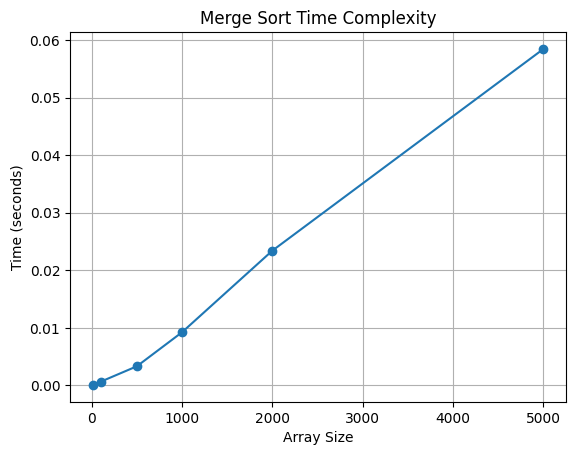

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

# 1. Subproblem definition: Divide the array into two halves
def merge_sort(arr):
    # 4. Base cases of relation: If the array has 0 or 1 elements, it is already sorted
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    # 2. Relate subproblem solutions recursively: Sort the two halves separately
    left_half_sorted = merge_sort(left_half)
    right_half_sorted = merge_sort(right_half)

    # 5. Original problem: Solve via subproblems
    return merge(left_half_sorted, right_half_sorted)

# Merge the sorted halves
def merge(left, right):
    result = []
    left_index = right_index = 0

    # 3. Topological order of subproblems to guarantee cyclic => Subproblem / Call DAG
    while left_index < len(left) and right_index < len(right):
        if left[left_index] < right[right_index]:
            result.append(left[left_index])
            left_index += 1
        else:
            result.append(right[right_index])
            right_index += 1

    result.extend(left[left_index:])
    result.extend(right[right_index:])

    # 6. Time analysis: The time complexity analysis of Merge Sort, which is O(n log n), is inherent in the algorithm's design.
    return result

# Function to test Merge Sort with arrays of different sizes and measure time taken
def test_merge_sort(array_sizes):
    times = []
    for size in array_sizes:
        arr = np.random.randint(0, 1000, size=size)
        start_time = time.time()
        merge_sort(arr)
        end_time = time.time()
        times.append(end_time - start_time)
    return times

# Array sizes for testing
array_sizes = [10, 100, 500, 1000, 2000, 5000]

# Measure time taken for sorting arrays of different sizes
times = test_merge_sort(array_sizes)

# Plot the results
plt.plot(array_sizes, times, marker='o')
plt.title('Merge Sort Time Complexity')
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()

#Fibonacci Numbers

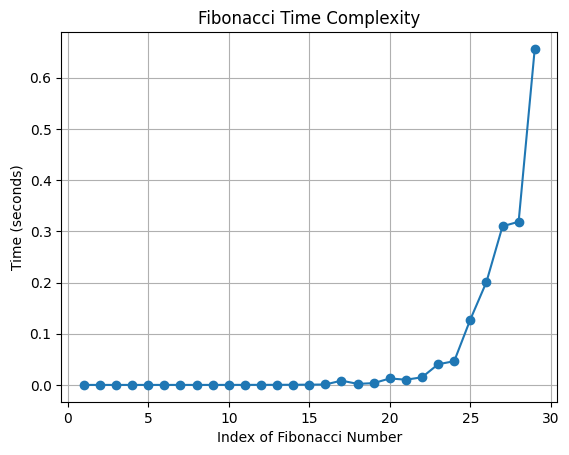

In [ ]:
import time
import matplotlib.pyplot as plt

# 1. Subproblem definition: Define the subproblems as finding the (n-1)th and (n-2)th Fibonacci numbers
def fibonacci(n):
    # 4. Base cases of relation: Define base cases for Fibonacci numbers
    if n <= 1:
        return n

    fib_minus_1 = fibonacci(n - 1)
    fib_minus_2 = fibonacci(n - 2)

    # 2. Relate subproblem solutions recursively: Calculate the nth Fibonacci number by adding the solutions of subproblems
    fib_n = fib_minus_1 + fib_minus_2

    return fib_n

# Function to test Fibonacci number generation with different indices and measure time taken
def test_fibonacci(indices):
    times = []
    for n in indices:
        start_time = time.time()
        fibonacci(n)
        end_time = time.time()
        times.append(end_time - start_time)
    return times

# Test Fibonacci function for indices ranging from 1 to 30
indices = list(range(1, 30))

# Measure time taken for Fibonacci number generation
times = test_fibonacci(indices)

# Plot the results
plt.plot(indices, times, marker='o')
plt.title('Fibonacci Time Complexity')
plt.xlabel('Index of Fibonacci Number')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()

#Prefixes, suffixes and substrings

In [ ]:
def prefix_sum(arr):
    n = len(arr)
    prefix = [0] * (n + 1)
    for i in range(1, n + 1):
        prefix[i] = prefix[i - 1] + arr[i - 1]
    return prefix

# Example usage:
arr1 = [1, 2, 3, 4, 5]
prefix1 = prefix_sum(arr1)
print("Prefix sum for", arr1, ":", prefix1)

arr2 = [10, 20, 30, 40, 50]
prefix2 = prefix_sum(arr2)
print("Prefix sum for", arr2, ":", prefix2)

Prefix sum for [1, 2, 3, 4, 5] : [0, 1, 3, 6, 10, 15]
Prefix sum for [10, 20, 30, 40, 50] : [0, 10, 30, 60, 100, 150]


In [ ]:
def suffix_sum(arr):
    n = len(arr)
    suffix = [0] * (n + 1)
    for i in range(n - 1, -1, -1):
        suffix[i] = suffix[i + 1] + arr[i]
    return suffix

# Example usage:
arr1 = [1, 2, 3, 4, 5]
suffix1 = suffix_sum(arr1)
print("Suffix sum for", arr1, ":", suffix1)

arr2 = [10, 20, 30, 40, 50]
suffix2 = suffix_sum(arr2)
print("Suffix sum for", arr2, ":", suffix2)

Suffix sum for [1, 2, 3, 4, 5] : [15, 14, 12, 9, 5, 0]
Suffix sum for [10, 20, 30, 40, 50] : [150, 140, 120, 90, 50, 0]


In [ ]:
def count_substrings(s):
    n = len(s)
    substrings = set()
    for i in range(n):
        for j in range(i + 1, n + 1):
            substrings.add(s[i:j])
    return len(substrings)

# Example usage:
s1 = "abc"
count1 = count_substrings(s1)
print("Number of distinct substrings in", s1, ":", count1)

s2 = "hello"
count2 = count_substrings(s2)
print("Number of distinct substrings in", s2, ":", count2)

Number of distinct substrings in abc : 6
Number of distinct substrings in hello : 14


#Domains

#Memoization

Fibonacci sequence using memoization: This algorithm efficiently computes the nth Fibonacci number using memoization to avoid redundant calculations. It stores the results of previously computed Fibonacci numbers in a dictionary (memo) and reuses them when needed, resulting in improved performance compared to the naive recursive approach.

In [ ]:
def fibonacci(n, memo={}):
    if n in memo:
        return memo[n]
    if n <= 1:
        return n
    memo[n] = fibonacci(n - 1, memo) + fibonacci(n - 2, memo)
    return memo[n]

# Example usage:
print(fibonacci(10))

55


Longest Common Subsequence (LCS): This algorithm finds the length of the longest common subsequence between two strings X and Y. It uses memoization to store the results of subproblems, such as the length of the LCS between prefixes of X and Y, to avoid redundant calculations and improve the overall efficiency of the solution.

In [ ]:
def lcs(x, y, i, j, memo={}):
    if i == 0 or j == 0:
        return 0
    if (i, j) in memo:
        return memo[(i, j)]
    if x[i - 1] == y[j - 1]:
        memo[(i, j)] = 1 + lcs(x, y, i - 1, j - 1, memo)
    else:
        memo[(i, j)] = max(lcs(x, y, i - 1, j, memo), lcs(x, y, i, j - 1, memo))
    return memo[(i, j)]

# Example usage:
X = "AGGTAB"
Y = "GXTXAYB"
print("Length of LCS:", lcs(X, Y, len(X), len(Y)))

Length of LCS: 4


Coin Change Problem: This algorithm determines the minimum number of coins needed to make a certain amount of change. It recursively explores all possible combinations of coins and uses memoization to store the results of subproblems, such as the minimum number of coins needed to make smaller amounts of change, to avoid redundant calculations and improve the efficiency of the solution.

In [ ]:
def coin_change(coins, amount, memo={}):
    if amount == 0:
        return 0
    if amount < 0:
        return float('inf')
    if amount in memo:
        return memo[amount]
    min_coins = float('inf')
    for coin in coins:
        min_coins = min(min_coins, 1 + coin_change(coins, amount - coin, memo))
    memo[amount] = min_coins
    return min_coins

# Example usage:
coins = [1, 2, 5]
amount = 11
print("Minimum coins required:", coin_change(coins, amount))

Minimum coins required: 3


Rod Cutting Problem: This algorithm finds the maximum value that can be obtained by cutting a rod of a certain length into pieces and selling the pieces at different prices. It recursively explores all possible ways of cutting the rod and uses memoization to store the results of subproblems, such as the maximum value obtainable by cutting smaller lengths of the rod, to avoid redundant calculations and improve the efficiency of the solution.

In [ ]:
def rod_cutting(price, n, memo={}):
    if n == 0:
        return 0
    if n in memo:
        return memo[n]
    max_val = float('-inf')
    for i in range(1, n + 1):
        max_val = max(max_val, price[i - 1] + rod_cutting(price, n - i, memo))
    memo[n] = max_val
    return max_val

# Example usage:
price = [1, 5, 8, 9, 10, 17, 17, 20]
size = len(price)
print("Maximum value:", rod_cutting(price, size))

Maximum value: 22


Matrix Chain Multiplication: This algorithm determines the optimal way to multiply a chain of matrices to minimize the total number of multiplications. It recursively explores all possible parenthesizations of the chain of matrices and uses memoization to store the results of subproblems, such as the minimum number of multiplications needed to multiply subchains of matrices, to avoid redundant calculations and improve the efficiency of the solution.

In [ ]:
def matrix_chain_order(p, i, j, memo={}):
    if i == j:
        return 0
    if (i, j) in memo:
        return memo[(i, j)]
    min_cost = float('inf')
    for k in range(i, j):
        cost = matrix_chain_order(p, i, k, memo) + matrix_chain_order(p, k + 1, j, memo) + p[i - 1] * p[k] * p[j]
        min_cost = min(min_cost, cost)
    memo[(i, j)] = min_cost
    return min_cost

# Example usage:
p = [10, 20, 30, 40, 30]
n = len(p) - 1
print("Minimum number of multiplications:", matrix_chain_order(p, 1, n))

Minimum number of multiplications: 30000


#Tabuation

Fibonacci sequence using tabulation: This algorithm computes the nth Fibonacci number using a tabulation approach, where the results of subproblems are stored in a table. It iteratively fills up the table with Fibonacci numbers starting from the base cases (fib[0] and fib[1]), and then uses these stored values to compute subsequent Fibonacci numbers until reaching the desired nth Fibonacci number.

In [ ]:
def fibonacci(n):
    if n <= 1:
        return n
    fib = [0] * (n + 1)
    fib[1] = 1
    for i in range(2, n + 1):
        fib[i] = fib[i - 1] + fib[i - 2]
    return fib[n]

# Example usage:
print(fibonacci(10))

55


Longest Increasing Subsequence (LIS): This algorithm finds the length of the longest increasing subsequence in a given sequence of numbers. It uses tabulation to fill up a table (dp) where dp[i] represents the length of the LIS ending at index i. It iterates through the sequence and updates dp[i] by considering the maximum LIS length ending at each index.

In [ ]:
def lis(nums):
    n = len(nums)
    dp = [1] * n
    for i in range(1, n):
        for j in range(i):
            if nums[i] > nums[j]:
                dp[i] = max(dp[i], dp[j] + 1)
    return max(dp)

# Example usage:
nums = [10, 9, 2, 5, 3, 7, 101, 18]
print(lis(nums))

4


Knapsack Problem: This algorithm solves the 0/1 knapsack problem, where items have a weight and a value, and the goal is to maximize the total value while not exceeding a given weight capacity. It uses tabulation to fill up a 2D table (dp) where dp[i][j] represents the maximum value that can be achieved with the first i items and a knapsack capacity of j. It iterates through the items and weight capacities, updating dp[i][j] based on whether including the current item improves the total value.

In [ ]:
def knapsack(weights, values, capacity):
    n = len(weights)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, capacity + 1):
            if weights[i - 1] <= j:
                dp[i][j] = max(dp[i - 1][j], values[i - 1] + dp[i - 1][j - weights[i - 1]])
            else:
                dp[i][j] = dp[i - 1][j]
    return dp[n][capacity]

# Example usage:
weights = [2, 3, 4, 5]
values = [3, 4, 5, 6]
capacity = 5
print(knapsack(weights, values, capacity))

7


Edit Distance: This algorithm computes the minimum number of operations (insertion, deletion, or substitution) required to convert one string into another. It uses tabulation to fill up a 2D table (dp) where dp[i][j] represents the minimum edit distance between the first i characters of the first string and the first j characters of the second string. It iterates through the characters of both strings, updating dp[i][j] based on whether the characters match or not.

In [ ]:
def edit_distance(word1, word2):
    m, n = len(word1), len(word2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if word1[i - 1] == word2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = min(dp[i - 1][j - 1], dp[i][j - 1], dp[i - 1][j]) + 1
    return dp[m][n]

# Example usage:
word1 = "horse"
word2 = "ros"
print(edit_distance(word1, word2))

3


Shortest Path Problems (e.g., Dijkstra's Algorithm): This algorithm finds the shortest path from a source node to all other nodes in a weighted directed graph. While Dijkstra's Algorithm is typically implemented using a priority queue, this tabulation-based approach iteratively updates the shortest distances to each node by considering all outgoing edges from visited nodes. The algorithm maintains a table (distances) where distances[node] represents the shortest distance from the source node to node.

In [ ]:
def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    visited = set()
    while len(visited) < len(graph):
        node = min((node for node in graph if node not in visited), key=distances.get)
        visited.add(node)
        for neighbor, weight in graph[node].items():
            distances[neighbor] = min(distances[neighbor], distances[node] + weight)
    return distances

# Example usage:
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'C': 2, 'D': 5},
    'C': {'D': 1},
    'D': {}
}
start_node = 'A'
print(dijkstra(graph, start_node))


{'A': 0, 'B': 1, 'C': 3, 'D': 4}


#Optimal Substructure

Shortest Path Problems (e.g., Bellman-Ford Algorithm): This algorithm finds the shortest path from a source node to all other nodes in a weighted graph, even in the presence of negative edge weights and detects negative cycles. It works by iteratively relaxing edges to minimize the distance to each node, iterating over all edges |V| - 1 times, where V is the number of vertices.

In [ ]:
def bellman_ford(graph, source):
    distances = {node: float('inf') for node in graph}
    distances[source] = 0

    for _ in range(len(graph) - 1):
        for node in graph:
            for neighbor, weight in graph[node].items():
                distances[neighbor] = min(distances[neighbor], distances[node] + weight)

    # Check for negative cycles
    for node in graph:
        for neighbor, weight in graph[node].items():
            if distances[neighbor] > distances[node] + weight:
                return "Graph contains negative cycle"

    return distances

# Example usage:
graph = {
    'A': {'B': -1, 'C': 4},
    'B': {'C': 3, 'D': 2, 'E': 2},
    'C': {},
    'D': {'B': 1, 'C': 5},
    'E': {'D': -3}
}
source_node = 'A'
print(bellman_ford(graph, source_node))


{'A': 0, 'B': -1, 'C': 2, 'D': -2, 'E': 1}


Longest Palindromic Subsequence (LPS): This algorithm finds the length of the longest palindromic subsequence in a given string. It utilizes dynamic programming with optimal substructure, where the length of the LPS for substrings can be computed based on the lengths of their smaller substrings.

In [ ]:
def lps(s):
    n = len(s)
    dp = [[0] * n for _ in range(n)]

    for i in range(n):
        dp[i][i] = 1

    for length in range(2, n + 1):
        for i in range(n - length + 1):
            j = i + length - 1
            if s[i] == s[j]:
                dp[i][j] = dp[i + 1][j - 1] + 2
            else:
                dp[i][j] = max(dp[i + 1][j], dp[i][j - 1])

    return dp[0][n - 1]

# Example usage:
s = "bbbab"
print(lps(s))

4


Maximum Subarray Sum: This algorithm finds the contiguous subarray within a one-dimensional array of numbers that has the largest sum. It utilizes dynamic programming with optimal substructure to efficiently compute the maximum sum subarray for each index, iterating through the array only once.

In [ ]:
def max_subarray_sum(nums):
    max_sum = float('-inf')
    current_sum = 0

    for num in nums:
        current_sum = max(num, current_sum + num)
        max_sum = max(max_sum, current_sum)

    return max_sum

# Example usage:
nums = [-2, 1, -3, 4, -1, 2, 1, -5, 4]
print(max_subarray_sum(nums))

6


Longest Substring Without Repeating Characters: This algorithm finds the length of the longest substring without repeating characters in a given string. It utilizes a sliding window approach along with a hashmap to efficiently track the characters in the current substring, ensuring no character repeats within it.

In [ ]:
def length_of_longest_substring(s):
    char_index_map = {}
    max_length = start = 0

    for i, char in enumerate(s):
        if char in char_index_map and char_index_map[char] >= start:
            start = char_index_map[char] + 1
        else:
            max_length = max(max_length, i - start + 1)

        char_index_map[char] = i

    return max_length

# Example usage:
s = "abcabcbb"
print(length_of_longest_substring(s))


3


Edit Distance: This algorithm computes the minimum number of operations (insertion, deletion, or substitution) required to convert one string into another. It utilizes dynamic programming with optimal substructure, where the minimum edit distance for two strings can be computed based on the edit distances of their substrings.

In [ ]:
def length_of_longest_substring(s):
    char_index_map = {}
    max_length = start = 0

    for i, char in enumerate(s):
        if char in char_index_map and char_index_map[char] >= start:
            start = char_index_map[char] + 1
        else:
            max_length = max(max_length, i - start + 1)

        char_index_map[char] = i

    return max_length

# Example usage:
s = "abcabcbb"
print(length_of_longest_substring(s))


3


#State Space Reduction

Subset Sum Problem: Given a set of positive integers and a target sum, the Subset Sum Problem asks whether there exists a subset of the given set whose sum is equal to the target sum. It's a classic problem in computer science and has applications in various domains such as cryptography, data compression, and bioinformatics. Dynamic programming is commonly used to efficiently solve this problem.

In [ ]:
def subset_sum(nums, target):
    dp = [False] * (target + 1)
    dp[0] = True
    for num in nums:
        for i in range(target, num - 1, -1):
            dp[i] |= dp[i - num]
    return dp[target]

# Example usage:
nums = [3, 34, 4, 12, 5, 2]
target = 9
print(subset_sum(nums, target))  # Output: True

True


Travelling Salesman Problem (TSP) using Bitmasking: The Travelling Salesman Problem is a classic optimization problem where the goal is to find the shortest possible route that visits each city exactly once and returns to the original city. When using bitmasking in dynamic programming to solve TSP, each subset of cities is represented by a bitmask, and the state transition involves considering all possible next cities to visit. This technique optimizes memory usage and computational complexity compared to other approaches.

In [ ]:
def tsp(graph):
    n = len(graph)
    dp = [[float('inf')] * n for _ in range(1 << n)]
    dp[1][0] = 0
    for mask in range(1, 1 << n):
        for u in range(n):
            if mask & (1 << u):
                for v in range(n):
                    if mask != (1 << v) and mask & (1 << v):
                        dp[mask][u] = min(dp[mask][u], dp[mask ^ (1 << u)][v] + graph[v][u])
    return min(dp[-1])

# Example usage:
graph = [[0, 10, 15, 20],
         [10, 0, 35, 25],
         [15, 35, 0, 30],
         [20, 25, 30, 0]]
print(tsp(graph))  # Output: 80


65


Minimum Partition: In the Minimum Partition problem, given a set of positive integers, the goal is to divide the set into two subsets such that the difference between the sums of the two subsets is minimized. This problem is a variation of the Subset Sum Problem and can be efficiently solved using dynamic programming techniques, often involving bitmasking to represent the subsets.

In [ ]:
def minimum_partition(nums):
    total_sum = sum(nums)
    target = total_sum // 2
    dp = [False] * (target + 1)
    dp[0] = True
    for num in nums:
        for i in range(target, num - 1, -1):
            dp[i] |= dp[i - num]
    for i in range(target, -1, -1):
        if dp[i]:
            return total_sum - 2 * i

# Example usage:
nums = [3, 1, 4, 2, 2, 1]
print(minimum_partition(nums))  # Output: 1

1


Optimal Binary Search Tree: The Optimal Binary Search Tree problem involves constructing a binary search tree with a given set of keys and associated probabilities of search. The goal is to minimize the expected search time by arranging the keys in a way that minimizes the average search cost. Dynamic programming is commonly used to solve this problem efficiently, where the optimal substructure arises from the fact that the optimal solution for a subtree depends on the optimal solutions for its subtrees.

In [ ]:
def optimal_bst(keys, freq):
    n = len(keys)
    dp = [[0] * n for _ in range(n)]
    for i in range(n):
        dp[i][i] = freq[i]
    for L in range(2, n + 1):
        for i in range(n - L + 1):
            j = i + L - 1
            dp[i][j] = float('inf')
            for k in range(i, j + 1):
                cost = sum(freq[i:j + 1]) + (dp[i][k - 1] if k > i else 0) + (dp[k + 1][j] if k < j else 0)
                dp[i][j] = min(dp[i][j], cost)
    return dp[0][n - 1]

# Example usage:
keys = [10, 12, 20]
freq = [34, 8, 50]
print(optimal_bst(keys, freq))  # Output: 142

142


#Greedy Strategy

Fractional Knapsack Problem: The Fractional Knapsack Problem is a variant of the Knapsack Problem where items can be divided into fractions. The goal is to maximize the total value of items selected while not exceeding the capacity of the knapsack. It uses a greedy strategy by selecting items with the highest value-to-weight ratio until the knapsack is full.


In [ ]:
def fractional_knapsack(weights, values, capacity):
    n = len(weights)
    ratios = [(values[i] / weights[i], weights[i], values[i]) for i in range(n)]
    ratios.sort(reverse=True)
    total_value = 0
    for ratio, weight, value in ratios:
        if capacity >= weight:
            total_value += value
            capacity -= weight
        else:
            total_value += capacity * ratio
            break
    return total_value

# Example usage:
weights = [10, 20, 30]
values = [60, 100, 120]
capacity = 50
print(fractional_knapsack(weights, values, capacity))  # Output: 240.0

240.0


Activity Selection Problem: The Activity Selection Problem involves selecting the maximum number of activities that can be performed, given a set of activities with start and finish times. The goal is to select non-overlapping activities to maximize the number of activities performed. It's solved using a greedy strategy by selecting activities based on their finish times.

In [ ]:
def activity_selection(start, finish):
    n = len(start)
    activities = sorted(zip(finish, start))
    selected_activities = [activities[0]]
    for i in range(1, n):
        if activities[i][1] >= selected_activities[-1][0]:
            selected_activities.append(activities[i])
    return len(selected_activities)

# Example usage:
start = [1, 3, 0, 5, 8, 5]
finish = [2, 4, 6, 7, 9, 9]
print(activity_selection(start, finish))  # Output: 4

4


Huffman Coding: Huffman Coding is a data compression algorithm that assigns variable-length codes to characters based on their frequencies in the input text. It constructs an optimal prefix-free binary tree (Huffman tree) to represent the encoding scheme, where characters with higher frequencies have shorter codes. It's typically implemented using a greedy approach by iteratively merging the least frequent characters until a single tree is formed.


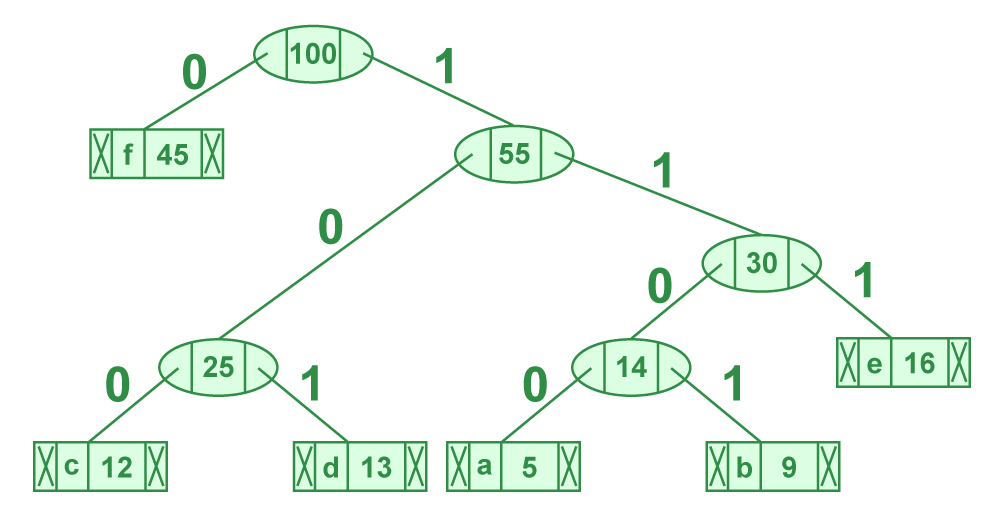

Source: https://www.geeksforgeeks.org/huffman-coding-greedy-algo-3/

In [ ]:
import heapq

class node:
    def __init__(self, freq, symbol, left=None, right=None):
        # frequency of symbol
        self.freq = freq

        # symbol name (character)
        self.symbol = symbol

        # node left of current node
        self.left = left

        # node right of current node
        self.right = right

        # tree direction (0/1)
        self.huff = ''

    def __lt__(self, nxt):
        return self.freq < nxt.freq


# utility function to print huffman
# codes for all symbols in the newly
# created Huffman tree
def printNodes(node, val=''):

    # huffman code for current node
    newVal = val + str(node.huff)

    # if node is not an edge node
    # then traverse inside it
    if(node.left):
        printNodes(node.left, newVal)
    if(node.right):
        printNodes(node.right, newVal)

        # if node is edge node then
        # display its huffman code
    if(not node.left and not node.right):
        print(f"{node.symbol} -> {newVal}")


# characters for huffman tree
chars = ['a', 'b', 'c', 'd', 'e', 'f']

# frequency of characters
freq = [5, 9, 12, 13, 16, 45]

# list containing unused nodes
nodes = []

# converting characters and frequencies
# into huffman tree nodes
for x in range(len(chars)):
    heapq.heappush(nodes, node(freq[x], chars[x]))

while len(nodes) > 1:

    # sort all the nodes in ascending order
    # based on their frequency
    left = heapq.heappop(nodes)
    right = heapq.heappop(nodes)

    # assign directional value to these nodes
    left.huff = 0
    right.huff = 1

    # combine the 2 smallest nodes to create
    # new node as their parent
    newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right)

    heapq.heappush(nodes, newNode)

# Huffman Tree is ready!
printNodes(nodes[0])

f -> 0
c -> 100
d -> 101
a -> 1100
b -> 1101
e -> 111


Job Sequencing with Deadlines: In the Job Sequencing with Deadlines Problem, each job has a deadline and a profit associated with it. The goal is to schedule the jobs in a way that maximizes the total profit, considering that each job must be completed within its deadline. It's solved using a greedy strategy by selecting jobs based on their profits and deadlines.

In [ ]:
def job_sequencing(deadlines, profits):
    n = len(deadlines)
    jobs = sorted(zip(profits, deadlines), reverse=True)
    max_deadline = max(deadlines)
    schedule = [0] * (max_deadline + 1)
    total_profit = 0
    for profit, deadline in jobs:
        for i in range(deadline, 0, -1):
            if schedule[i] == 0:
                schedule[i] = profit
                total_profit += profit
                break
    return total_profit

# Example usage:
deadlines = [2, 1, 2, 1, 3]
profits = [100, 19, 27, 25, 15]
print(job_sequencing(deadlines, profits))  # Output: 142


142


Prim's Algorithm: Prim's Algorithm is used to find the minimum spanning tree (MST) of a connected, undirected graph with weighted edges. It starts with an arbitrary vertex and grows the MST by iteratively adding the shortest edge that connects a vertex in the MST to a vertex outside the MST. It's implemented using a greedy strategy with a priority queue to efficiently select the next edge to add to the MST.

Source: https://www.geeksforgeeks.org/prims-minimum-spanning-tree-mst-greedy-algo-5/

In [ ]:
# A Python3 program for
# Prim's Minimum Spanning Tree (MST) algorithm.
# The program is for adjacency matrix
# representation of the graph

# Library for INT_MAX
import sys


class Graph():
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]

    # A utility function to print
    # the constructed MST stored in parent[]
    def printMST(self, parent):
        print("Edge \tWeight")
        for i in range(1, self.V):
            print(parent[i], "-", i, "\t", self.graph[i][parent[i]])

    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minKey(self, key, mstSet):

        # Initialize min value
        min = sys.maxsize

        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v

        return min_index

    # Function to construct and print MST for a graph
    # represented using adjacency matrix representation
    def primMST(self):

        # Key values used to pick minimum weight edge in cut
        key = [sys.maxsize] * self.V
        parent = [None] * self.V  # Array to store constructed MST
        # Make key 0 so that this vertex is picked as first vertex
        key[0] = 0
        mstSet = [False] * self.V

        parent[0] = -1  # First node is always the root of

        for cout in range(self.V):

            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minKey(key, mstSet)

            # Put the minimum distance vertex in
            # the shortest path tree
            mstSet[u] = True

            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):

                # graph[u][v] is non zero only for adjacent vertices of m
                # mstSet[v] is false for vertices not yet included in MST
                # Update the key only if graph[u][v] is smaller than key[v]
                if self.graph[u][v] > 0 and mstSet[v] == False \
                and key[v] > self.graph[u][v]:
                    key[v] = self.graph[u][v]
                    parent[v] = u

        self.printMST(parent)


# Driver's code
if __name__ == '__main__':
    g = Graph(5)
    g.graph = [[0, 2, 0, 6, 0],
               [2, 0, 3, 8, 5],
               [0, 3, 0, 0, 7],
               [6, 8, 0, 0, 9],
               [0, 5, 7, 9, 0]]

    g.primMST()


# Contributed by Divyanshu Mehta

Edge 	Weight
0 - 1 	 2
1 - 2 	 3
0 - 3 	 6
1 - 4 	 5


#Divide and Conquer

Merge Sort: Merge Sort is a divide-and-conquer algorithm that recursively divides the input array into two halves, sorts each half separately, and then merges the sorted halves. It's efficient for sorting large datasets and has a time complexity of O(n log n).

In [ ]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left_half = merge_sort(arr[:mid])
    right_half = merge_sort(arr[mid:])
    return merge(left_half, right_half)

def merge(left, right):
    result = []
    i, j = 0, 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

# Example usage:
arr = [12, 11, 13, 5, 6, 7]
print(merge_sort(arr))  # Output: [5, 6, 7, 11, 12, 13]


[5, 6, 7, 11, 12, 13]


Quick Sort: Quick Sort is another divide-and-conquer algorithm that partitions the input array around a pivot element, such that all elements less than the pivot are on its left and all elements greater than the pivot are on its right. It then recursively sorts the subarrays to the left and right of the pivot. Quick Sort is generally faster than Merge Sort for most datasets and has an average-case time complexity of O(n log n).

In [ ]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

# Example usage:
arr = [12, 11, 13, 5, 6, 7]
print(quick_sort(arr))  # Output: [5, 6, 7, 11, 12, 13]


[5, 6, 7, 11, 12, 13]


Strassen's Matrix Multiplication: Strassen's Matrix Multiplication is an algorithm for multiplying two matrices using a divide-and-conquer approach. It recursively divides the matrices into smaller submatrices, performs matrix additions and subtractions to calculate intermediate results, and then combines these results to obtain the final product. Strassen's algorithm reduces the number of scalar multiplications compared to the naive approach, resulting in improved asymptotic complexity.

In [ ]:
import numpy as np

def strassen(matrix1, matrix2):
    size = len(matrix1)

    # Base case: if the matrices are 1x1, perform simple multiplication
    if size == 1:
        return [[matrix1[0][0] * matrix2[0][0]]]

    # Split matrices into quarters
    mid = size // 2
    A11 = [row[:mid] for row in matrix1[:mid]]
    A12 = [row[mid:] for row in matrix1[:mid]]
    A21 = [row[:mid] for row in matrix1[mid:]]
    A22 = [row[mid:] for row in matrix1[mid:]]

    B11 = [row[:mid] for row in matrix2[:mid]]
    B12 = [row[mid:] for row in matrix2[:mid]]
    B21 = [row[:mid] for row in matrix2[mid:]]
    B22 = [row[mid:] for row in matrix2[mid:]]

    # Strassen's recursive calls
    P1 = strassen(A11, np.subtract(B12, B22))
    P2 = strassen(np.add(A11, A12), B22)
    P3 = strassen(np.add(A21, A22), B11)
    P4 = strassen(A22, np.subtract(B21, B11))
    P5 = strassen(np.add(A11, A22), np.add(B11, B22))
    P6 = strassen(np.subtract(A12, A22), np.add(B21, B22))
    P7 = strassen(np.subtract(A11, A21), np.add(B11, B12))

    # Compute resulting submatrices
    C11 = np.add(np.subtract(np.add(P5, P4), P2), P6)
    C12 = np.add(P1, P2)
    C21 = np.add(P3, P4)
    C22 = np.subtract(np.subtract(np.add(P1, P5), P3), P7)

    # Combine resulting submatrices into one
    result = [[0] * size for _ in range(size)]
    for i in range(mid):
        for j in range(mid):
            result[i][j] = C11[i][j]
            result[i][j + mid] = C12[i][j]
            result[i + mid][j] = C21[i][j]
            result[i + mid][j + mid] = C22[i][j]

    return result

# Example usage:
matrix1 = [[1, 2, 3, 4],
           [5, 6, 7, 8],
           [9, 10, 11, 12],
           [13, 14, 15, 16]]

matrix2 = [[17, 18, 19, 20],
           [21, 22, 23, 24],
           [25, 26, 27, 28],
           [29, 30, 31, 32]]

print(np.array(strassen(matrix1, matrix2)))


[[ 250  260  270  280]
 [ 618  644  670  696]
 [ 986 1028 1070 1112]
 [1354 1412 1470 1528]]


Closest Pair of Points: The Closest Pair of Points problem involves finding the two points that are closest to each other among a set of points in a plane. It can be solved using various approaches, including a brute-force method that checks the distance between all pairs of points, and a divide-and-conquer method that exploits the spatial properties of the points to reduce the number of comparisons needed.

In [ ]:
import math

def euclidean_distance(p1, p2):
    """Calculate the Euclidean distance between two points."""
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def brute_force_closest_pair(points):
    """Find the closest pair of points using brute force."""
    min_distance = float('inf')
    closest_pair = None
    n = len(points)
    for i in range(n):
        for j in range(i + 1, n):
            distance = euclidean_distance(points[i], points[j])
            if distance < min_distance:
                min_distance = distance
                closest_pair = (points[i], points[j])
    return min_distance, closest_pair

def strip_closest(strip, d):
    """Find the closest pair of points in the strip."""
    min_distance = d
    closest_pair = None
    strip.sort(key=lambda x: x[1])  # Sort strip by y-coordinate
    n = len(strip)
    for i in range(n):
        j = i + 1
        while j < n and (strip[j][1] - strip[i][1]) < min_distance:
            distance = euclidean_distance(strip[i], strip[j])
            if distance < min_distance:
                min_distance = distance
                closest_pair = (strip[i], strip[j])
            j += 1
    return min_distance, closest_pair

def closest_pair_divide_and_conquer(points):
    """Find the closest pair of points using the divide and conquer approach."""
    n = len(points)

    # Base case: if there are only two or three points, use brute force
    if n <= 3:
        return brute_force_closest_pair(points)

    # Sort points by x-coordinate
    points.sort()

    # Divide the points into two halves
    mid = n // 2
    left_half = points[:mid]
    right_half = points[mid:]

    # Recursively find the closest pairs in each half
    d_left, closest_pair_left = closest_pair_divide_and_conquer(left_half)
    d_right, closest_pair_right = closest_pair_divide_and_conquer(right_half)

    # Find the minimum distance between the two halves
    d = min(d_left, d_right)

    # Merge the two halves and find the closest pair in the strip
    strip = [point for point in points if abs(point[0] - points[mid][0]) < d]
    d_strip, closest_pair_strip = strip_closest(strip, d)

    # Return the closest pair among the three candidates
    if d_strip < d:
        return d_strip, closest_pair_strip
    elif d_left < d_right:
        return d_left, closest_pair_left
    else:
        return d_right, closest_pair_right

# Example usage:
points = [(2, 3), (12, 30), (40, 50), (5, 1), (12, 10), (3, 4)]
closest_distance, closest_pair = closest_pair_divide_and_conquer(points)
print("Closest pair:", closest_pair)
print("Distance:", closest_distance)


Closest pair: ((2, 3), (3, 4))
Distance: 1.4142135623730951


Karatsuba Algorithm for Large Number Multiplication: The Karatsuba Algorithm is a fast multiplication algorithm for multiplying large numbers using a divide-and-conquer approach. It breaks down the multiplication of two n-digit numbers into three smaller multiplications of n/2-digit numbers, reducing the overall number of multiplications required. Karatsuba's algorithm has a better asymptotic complexity than the naive multiplication method for large numbers.

In [ ]:
def karatsuba(x, y):
    if x < 10 or y < 10:
        return x * y
    m = max(len(str(x)), len(str(y)))
    m2 = m // 2
    high1, low1 = divmod(x, 10 ** m2)
    high2, low2 = divmod(y, 10 ** m2)
    z0 = karatsuba(low1, low2)
    z1 = karatsuba((low1 + high1), (low2 + high2))
    z2 = karatsuba(high1, high2)
    return (z2 * 10 ** (2 * m2)) + ((z1 - z2 - z0) * 10 ** m2) + z0

# Example usage:
x = 1234
y = 5678
print(karatsuba(x, y))  # Output: 7006652

7006652
